In [19]:
import numpy as np
import xcorr
import glob
import matplotlib.pyplot as plt
from twentyonecmFAST import load_binary_data
from matplotlib.colors import SymLogNorm
from scipy.ndimage import gaussian_filter
from astropy import units as u
from astropy.cosmology import Planck15 as cosmo
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.interpolate import interp1d
from scipy.ndimage import gaussian_filter1d

## Panel Plot

In [2]:
T_8 = load_binary_data('../../data/delta_T_v3_z008.06_nf0.553432_useTs1_256_200Mpc')
T_8 = np.reshape(T_8, (256, 256, 256))[:, :, 128]
T_7 = load_binary_data('../../data/delta_T_v3_z007.04_nf0.233584_useTs1_256_200Mpc')
T_7 = np.reshape(T_7, (256, 256, 256))[:, :, 128]
T_6 = load_binary_data('../../data/delta_T_v3_z006.00_nf0.025588_useTs1_256_200Mpc')
T_6 = np.reshape(T_6, (256, 256, 256))[:, :, 128]

In [3]:
halos = np.loadtxt('../../data/halos_z8.06_768_200Mpc')
halo_pos = (halos[:, 1:] * 256).astype(int)
halo_mass = halos[:, 0]
I_8 = xcorr.cube_brightness(halo_mass, halo_pos, z = 8.04)[:, :, 128]

halos = np.loadtxt('../../data/halos_z7.04_768_200Mpc')
halo_pos = (halos[:, 1:] * 256).astype(int)
halo_mass = halos[:, 0]
I_7 = xcorr.cube_brightness(halo_mass, halo_pos, z = 7.04)[:, :, 128]

halos = np.loadtxt('../../data/halos_z6.00_768_200Mpc')
halo_pos = (halos[:, 1:] * 256).astype(int)
halo_mass = halos[:, 0]
I_6 = xcorr.cube_brightness(halo_mass, halo_pos, z = 6.)[:, :, 128]

In [4]:
d_6 = load_binary_data('../../data/updated_smoothed_deltax_z006.00_256_200Mpc')
d_6 = np.reshape(d_6, (256, 256, 256))
x_6 = load_binary_data('../../data/xH_z006.00_nf0.025588_Fstar0.0500_starPL0.5000_Fesc0.1000_escPL-0.5000_Mturn5.00e+08_HIIfilter1_RHIImax50_256_200Mpc')
x_6 = np.reshape(x_6, (256, 256, 256))
I_6_d = xcorr.I_diffuse(_, 1-x_6, d_6, z = 6.)[:, :, 128]

d_7 = load_binary_data('../../data/updated_smoothed_deltax_z007.04_256_200Mpc')
d_7 = np.reshape(d_7, (256, 256, 256))
x_7 = load_binary_data('../../data/xH_z007.04_nf0.233584_Fstar0.0500_starPL0.5000_Fesc0.1000_escPL-0.5000_Mturn5.00e+08_HIIfilter1_RHIImax50_256_200Mpc')
x_7 = np.reshape(x_7, (256, 256, 256))
I_7_d = xcorr.I_diffuse(_, 1-x_7, d_7, z = 7.04)[:, :, 128]

d_8 = load_binary_data('../../data/updated_smoothed_deltax_z008.06_256_200Mpc')
d_8 = np.reshape(d_8, (256, 256, 256))
x_8 = load_binary_data('../../data/xH_z008.06_nf0.553432_Fstar0.0500_starPL0.5000_Fesc0.1000_escPL-0.5000_Mturn5.00e+08_HIIfilter1_RHIImax50_256_200Mpc')
x_8 = np.reshape(x_8, (256, 256, 256))
I_8_d = xcorr.I_diffuse(_, 1-x_8, d_8, z = 8.04)[:, :, 128]

In [5]:
smooth = 1.

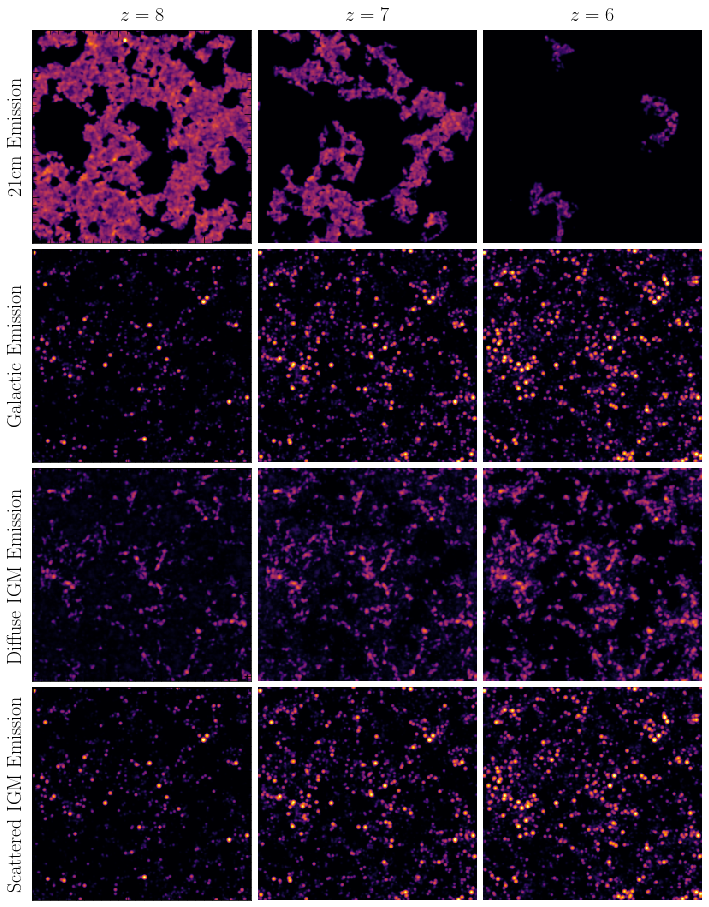

In [6]:
fig, ax = plt.subplots(4, 3, figsize = (12,16))

ax = ax.ravel()


# Row 1

ax[0].imshow(gaussian_filter(T_8, smooth), aspect = 'auto', cmap = 'inferno', 
             norm = SymLogNorm(10, vmax = 200))
#ax[0].axis('off')
ax[0].xaxis.set_ticklabels([])
ax[0].yaxis.set_ticklabels([])
ax[0].set_ylabel('21cm Emission', fontsize = 20)
ax[0].set_title(r'$z = 8$', fontsize = 20, pad = 10)

ax[1].imshow(gaussian_filter(T_7, smooth), aspect = 'auto', cmap = 'inferno', 
             norm = SymLogNorm(10, vmax = 200))
ax[1].axis('off')
ax[1].set_title(r'$z = 7$', fontsize = 20, pad = 10)

a = ax[2].imshow(gaussian_filter(T_6, smooth), aspect = 'auto', cmap = 'inferno', 
             norm = SymLogNorm(10, vmax = 200))
ax[2].axis('off')
ax[2].set_title(r'$z = 6$', fontsize = 20, pad = 10)


# Row 2

ax[3].imshow(gaussian_filter(I_8, smooth), aspect = 'auto', cmap = 'inferno',
             norm = SymLogNorm(1e-8, vmax = 1e-6))
ax[3].xaxis.set_ticklabels([])
ax[3].yaxis.set_ticklabels([])
ax[3].set_ylabel(r'Galactic Emission', fontsize = 20)

ax[4].imshow(gaussian_filter(I_7, smooth), aspect = 'auto', cmap = 'inferno',
             norm = SymLogNorm(1e-8, vmax = 1e-6))
ax[4].axis('off')

b = ax[5].imshow(gaussian_filter(I_6, smooth), aspect = 'auto', cmap = 'inferno',
             norm = SymLogNorm(1e-8, vmax = 1e-6))
ax[5].axis('off')

# Row 3

ax[6].imshow(gaussian_filter(I_6_d, smooth) * 5e-5, aspect = 'auto', cmap = 'inferno',
             norm = SymLogNorm(1e-8, vmax = 1e-6))
ax[6].xaxis.set_ticklabels([])
ax[6].yaxis.set_ticklabels([])
ax[6].set_ylabel(r'Diffuse IGM Emission', fontsize = 20)

ax[7].imshow(gaussian_filter(I_7_d, smooth) * 5e-5, aspect = 'auto', cmap = 'inferno',
             norm = SymLogNorm(1e-8, vmax = 1e-6))
ax[7].axis('off')

c = ax[8].imshow(gaussian_filter(I_8_d, smooth) * 5e-5, aspect = 'auto', cmap = 'inferno',
             norm = SymLogNorm(1e-8, vmax = 1e-6))
ax[8].axis('off')


# Row 4

ax[9].imshow(gaussian_filter(I_8, smooth), aspect = 'auto', cmap = 'inferno',
             norm = SymLogNorm(1e-8, vmax = 1e-6))
ax[9].xaxis.set_ticklabels([])
ax[9].yaxis.set_ticklabels([])
ax[9].set_ylabel(r'Scattered IGM Emission', fontsize = 20)

ax[10].imshow(gaussian_filter(I_7, smooth), aspect = 'auto', cmap = 'inferno',
             norm = SymLogNorm(1e-8, vmax = 1e-6))
ax[10].axis('off')

d = ax[11].imshow(gaussian_filter(I_6, smooth), aspect = 'auto', cmap = 'inferno',
             norm = SymLogNorm(1e-8, vmax = 1e-6))
ax[11].axis('off')




#divider = make_axes_locatable(ax[2])
#cax1 = divider.append_axes("right", size="5%", pad=0.07)

#divider = make_axes_locatable(ax[5])
#cax2 = divider.append_axes("right", size="5%", pad=0.07)

#divider = make_axes_locatable(ax[8])
#cax3 = divider.append_axes("right", size="5%", pad=0.07)

#divider = make_axes_locatable(ax[11])
#cax4 = divider.append_axes("right", size="5%", pad=0.07)


#fig.colorbar(a, cax=cax1)
#fig.colorbar(b, cax=cax2)
#fig.colorbar(c, cax=cax3)
#fig.colorbar(d, cax=cax4)

plt.subplots_adjust(wspace = 0.03, hspace = 0.03)

plt.savefig('sims.png', dpi = 500, bbox_inches = 'tight', transparent=True)

## Cross-Correlation Coefficient

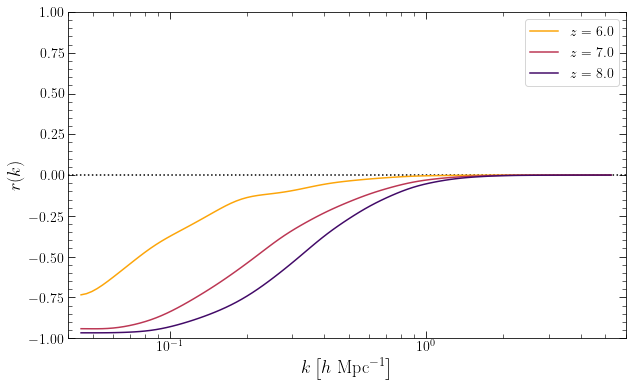

In [7]:
files = glob.glob('data/ccc_*npy')
files.sort()

k = np.load('data/ks.npy')

k_spaced = np.logspace(np.log10(k.min() + 0.005),  np.log10(k.max() - 0.005), 100)

zs = [6.0, 7.0, 8.0]
colors = plt.cm.inferno(np.linspace(0.2, 0.8, 3)[::-1])
plt.figure(figsize=(10,6))

for i in np.arange(len(files) - 1):
    r = np.load(files[i])
    ps = interp1d(k, r, kind = 'linear')
    plt.plot(k_spaced, gaussian_filter(ps(k_spaced), 3.), color = colors[i], label = '$z =$ {}'.format(zs[i]))

plt.xscale('log')
plt.xlim([4e-2, 6])
plt.ylim([-1, 1])
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel(r'$k \left[h \ {\rm Mpc}^{-1} \right]$', fontsize = 18)
plt.ylabel('$r(k)$', fontsize = 18)
plt.axhline(0, color = 'k', linestyle = ':', zorder = 0)
plt.legend(fontsize = 14)
plt.savefig('ccc_plot.png', dpi = 500, bbox_inches = 'tight', transparent=True)

## Ly$\alpha$ Power Spectrum

In [8]:
z = 6.0
halos = np.loadtxt('../../data/halos_z6.00_768_200Mpc')
halo_pos = (halos[:, 1:] * 256).astype(int)
halo_mass = halos[:, 0]

lya_cube = xcorr.cube_brightness(halo_mass, halo_pos, z)
ps_6, k = xcorr.dimensional_ps(lya_cube, 200, bins = 14, log_bins = True)

In [9]:
z = 7.04
halos = np.loadtxt('../../data/halos_z7.04_768_200Mpc')
halo_pos = (halos[:, 1:] * 256).astype(int)
halo_mass = halos[:, 0]

lya_cube = xcorr.cube_brightness(halo_mass, halo_pos, z)
ps_7, k = xcorr.dimensional_ps(lya_cube, 200, bins = 14, log_bins = True)

In [10]:
z = 8.06
halos = np.loadtxt('../../data/halos_z8.06_768_200Mpc')
halo_pos = (halos[:, 1:] * 256).astype(int)
halo_mass = halos[:, 0]

lya_cube = xcorr.cube_brightness(halo_mass, halo_pos, z)
ps_8, k = xcorr.dimensional_ps(lya_cube, 200, bins = 14, log_bins = True)

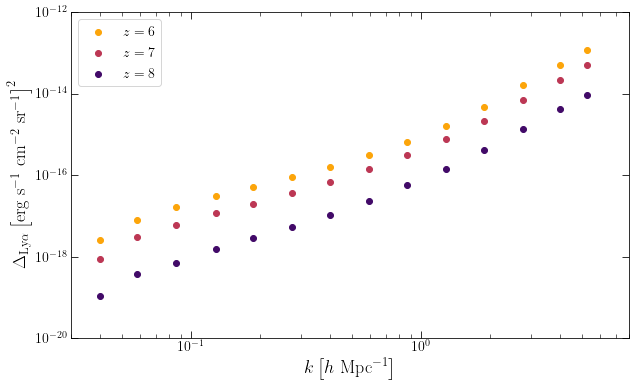

In [11]:
plt.figure(figsize = (10, 6))
plt.scatter(k, ps_6, color = colors[0], label = r'$z = 6$')
plt.plot(k, ps_6, color = colors[0], alpha = 0.)
plt.scatter(k, ps_7, color = colors[1], label = r'$z = 7$')
plt.scatter(k, ps_8, color = colors[2], label = r'$z = 8$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k \left[h \ {\rm Mpc}^{-1} \right]$', fontsize = 18)
plt.ylabel(r'$\Delta_{\rm Ly \alpha} \left[{\rm erg \ s^{-1} \ cm^{-2} \ sr^{-1}}\right]^2$', fontsize = 18)
plt.xlim([3e-2, 8])
plt.ylim([1e-20, 1e-12])
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize = 14)
plt.savefig('lyman_alpha_pspec.png', dpi = 500, bbox_inches = 'tight', transparent = True)

## 21cm Power Spectrum

In [12]:
dT_6 = load_binary_data('../../data/delta_T_v3_z006.00_nf0.025588_useTs1_256_200Mpc')
dT_6 = np.reshape(dT_6, (256, 256, 256))
ps_21_6, k = xcorr.dimensional_ps(dT_6, 200, bins = 14, log_bins = True)

dT_7 = load_binary_data('../../data/delta_T_v3_z007.04_nf0.233584_useTs1_256_200Mpc')
dT_7 = np.reshape(dT_7, (256, 256, 256))
ps_21_7, k = xcorr.dimensional_ps(dT_7, 200, bins = 14, log_bins = True)

dT_8 = load_binary_data('../../data/delta_T_v3_z008.06_nf0.553432_useTs1_256_200Mpc')
dT_8 = np.reshape(dT_8, (256, 256, 256))
ps_21_8, k = xcorr.dimensional_ps(dT_8, 200, bins = 14, log_bins = True)


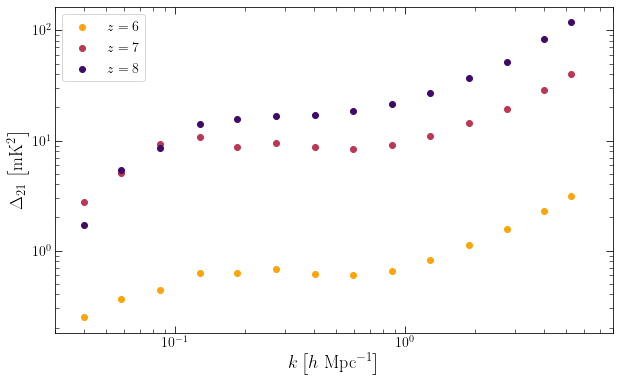

In [14]:
plt.figure(figsize = (10,6))
plt.scatter(k, ps_21_6, label = r'$z = 6$', color = colors[0])
plt.scatter(k, ps_21_7, label = r'$z = 7$', color = colors[1])
plt.scatter(k, ps_21_8, label = r'$z = 8$', color = colors[2])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k \left[h \ {\rm Mpc}^{-1} \right]$', fontsize = 18)
plt.ylabel(r'$\Delta_{21}$ $\left[{\rm mK}^{2} \right]$', fontsize = 18)
plt.legend(fontsize = 14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlim([3e-2, 8])
plt.savefig('21cm_power_spectrum.png', dpi = 500, bbox_inches = 'tight', transparent = True)

## 21cm-Ly$\alpha$ Power Spectrum

In [15]:
halos = np.loadtxt('../../data/halos_z8.06_768_200Mpc')
halo_pos = (halos[:, 1:] * 256).astype(int)
halo_mass = halos[:, 0]
I_8 = xcorr.cube_brightness(halo_mass, halo_pos, z = 8.04)

ps_x_8, k = xcorr.power_spectra(dT_8 * xcorr.mK_to_SB(1. * u.mK, z = 8.04).value, 200, 
                                 deltax2 = I_8,  bins = 14, log_bins = True)
del I_8

halos = np.loadtxt('../../data/halos_z7.04_768_200Mpc')
halo_pos = (halos[:, 1:] * 256).astype(int)
halo_mass = halos[:, 0]
I_7 = xcorr.cube_brightness(halo_mass, halo_pos, z = 7.04)

ps_x_7, k = xcorr.power_spectra(dT_7 * xcorr.mK_to_SB(1. * u.mK, z = 7.04).value, 200, 
                                 deltax2 = I_7,  bins = 14, log_bins = True)
del I_7

halos = np.loadtxt('../../data/halos_z6.00_768_200Mpc')
halo_pos = (halos[:, 1:] * 256).astype(int)
halo_mass = halos[:, 0]
I_6 = xcorr.cube_brightness(halo_mass, halo_pos, z = 6.)

ps_x_6, k = xcorr.power_spectra(dT_6 * xcorr.mK_to_SB(1. * u.mK, z = 6.).value, 200, 
                                deltax2 = I_6, bins = 14, log_bins = True)
del I_6

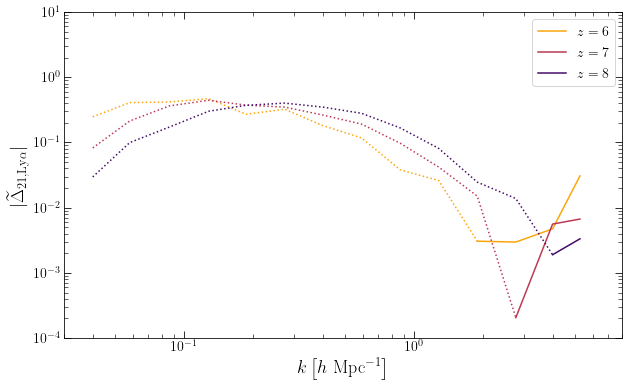

In [16]:
plt.figure(figsize = (10,6))
plt.plot(k[:11], np.abs(ps_x_6[:11]), linestyle = ':', color = colors[0])
plt.plot(k[10:], np.abs(ps_x_6[10:]), label = r'$z = 6$', color = colors[0])

plt.plot(k[:12], np.abs(ps_x_7[:12]), linestyle = ':', color = colors[1])
plt.plot(k[11:], np.abs(ps_x_7[11:]), label = r'$z = 7$', color = colors[1])

plt.plot(k[:13], np.abs(ps_x_8[:13]), linestyle = ':', color = colors[2])
plt.plot(k[12:], np.abs(ps_x_8[12:]), label = r'$z = 8$', color = colors[2])

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k \left[h \ \mathrm{Mpc}^{-1} \right]$', fontsize = 18)
plt.ylabel(r' $|\widetilde{\Delta}_{21, \mathrm{Ly}\alpha} |$', fontsize = 18)
plt.legend(fontsize = 14)
plt.xlim([3e-2, 8])
plt.ylim([1e-4, 1e1])
plt.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('cross_power_spec.png', dpi = 500, bbox_inches = 'tight', transparent = True)

In [69]:
np.where(ps_x_6 < 0.)[0], np.where(ps_x_7 < 0.)[0], np.where(ps_x_8 < 0.)[0]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 13]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]))

In [70]:
k[11], k[12], k[13]

(2.76909437477448, 4.001500220195118, 5.263258094806566)

## Noise Power Spectra

Apparently, I'm terrible at organizing code. Check `Noise_Power_Spectra.ipynb` for noise estimates. Will migrate eventually if anyone actually ever cares about this work

In [17]:
opt_files = glob.glob('z*opt.npz')
opt_files.sort()

mod_files = glob.glob('z*mod.npz')
mod_files.sort()

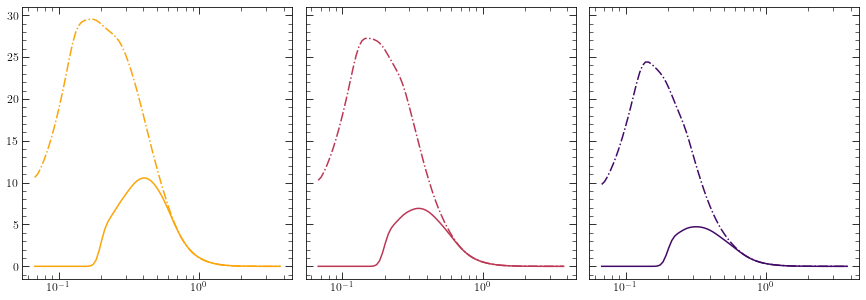

In [29]:
fig, axs = plt.subplots(1, 3, figsize = (15, 5), sharey = True)
axs = axs.ravel()

for i in range(len(mod_files)):
    mod = np.load(mod_files[i])
    opt = np.load(opt_files[i])
    axs[i].plot(mod['ks'], gaussian_filter1d(np.abs(mod['xps']) / mod['noise'], 1.5), color = colors[i])
    axs[i].plot(opt['ks'], gaussian_filter1d(np.abs(opt['xps']) / opt['noise'], 1.5), color = colors[i], linestyle = '-.')
    axs[i].set_xscale('log')
    
plt.subplots_adjust(wspace = 0.05)
plt.show()

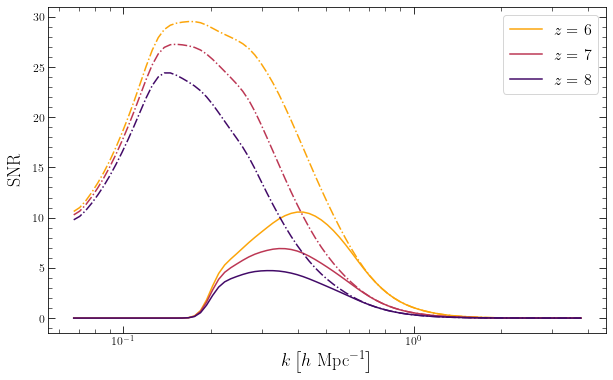

In [44]:
z = [6,7,8]
plt.figure(figsize=(10,6))

for i in range(len(mod_files)):
    mod = np.load(mod_files[i])
    opt = np.load(opt_files[i])
    #plt.plot(mod['ks'], np.abs(mod['xps']) / mod['noise'], 
    #         color = colors[i], label = r'$z = $ {}'.format(z[i]))
    #plt.plot(opt['ks'], np.abs(opt['xps']) / opt['noise'], color = colors[i], 
    #         linestyle = '-.')
    plt.plot(mod['ks'], gaussian_filter1d(np.abs(mod['xps']) / mod['noise'], 1.5), 
             color = colors[i], label = r'$z = $ {}'.format(z[i]))
    plt.plot(opt['ks'], gaussian_filter1d(np.abs(opt['xps']) / opt['noise'], 1.5), color = colors[i], 
             linestyle = '-.')

plt.xscale('log')
plt.legend(fontsize = 16)
plt.xlabel(r'$k \left[h \ \mathrm{Mpc}^{-1} \right]$', fontsize = 18)
plt.ylabel(r'SNR', fontsize = 18, labelpad = 10)
plt.show()

In [51]:
o = np.abs(opt['xps']) / opt['noise']
o[np.isinf(o)] = 0.

In [52]:
np.sqrt(np.matmul(o, o.T))

111.00052939294704

In [ ]:
def binary_to_cube(f):
    data = load_binary_data(f)
    try:
        cube = np.reshape(data,)

In [55]:
a = load_binary_data('../../data/delta_T_v3_z006.00_nf0.025588_useTs1_256_200Mpc')

In [62]:
np.reshape(a, 3 * [256])

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.